In [1]:
# size of mote carlo sampling
sampSize = 10

In [2]:
%%time
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'class-specific_q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol, excludedCols = excluded)
features = [x for x in list(dSlow.columns) if (x not in excluded)]

file read...
strings converted to floats...
q-values estimated...
ranks computed...
features normed...
floats converted to ints...
file ready!
Wall time: 18.8 s


# TODO: MONTE CARLO SAMPLING INTO BOX PLOTS?

In [60]:
# set up metrics of original data set

oriIdents = []
oriExpectIdents = []
oriLen = []
oriAUCs = []
dxl = dSlow.loc[dSlow['NuXL:isXL'] == 1]
    
for i in range(sampSize):
    expIdTemp = []
    lenTemp = []
    idTemp = []
    aucTemp = []
    for portion in range(12): # smallest df has 3 entries
        newDf = dxl.loc[dxl['q-val'] <= 0.1].sample(frac = 1/pow(2,portion))
        expIdTemp.append(len(newDf.loc[newDf['q-val'] <= 0.01]))
        newDf = calcQ(newDf, 'NuXL:score')
        try:
            aucTemp.append(pseudoROC(newDf, plot = False))
        except:
            aucTemp.append(0.0)
        lenTemp.append(len(newDf))
        idTemp.append(len(newDf.loc[newDf['q-val'] <= 0.01]))
    oriExpectIdents.append(expIdTemp)
    oriLen.append(lenTemp)
    oriIdents.append(idTemp)
    oriAUCs.append(aucTemp)

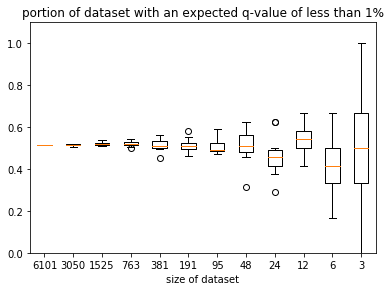

In [66]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_ylim(0,1.1)
x = range(1,13)

# for every sample round, for every dataset size, divide number of expected idents by the dataset size
l = [[e/l for e,l in zip(es,ls)] for es,ls in zip(oriExpectIdents,oriLen)]
# transpose for boxplots
y = list(map(list, zip(*l)))

ax.boxplot(y)
ax.set_xlabel('size of dataset')
ax.set_title('portion of dataset with an expected q-value of less than 1%')
ax.set_xticks(x)
ax.set_xticklabels(oriLen[0])
plt.savefig('../results/ratioTests/boxplots/result_splitting_dxl.png')
plt.show()

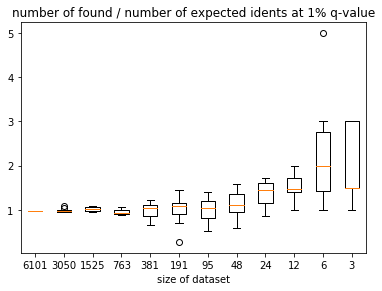

In [67]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
x = range(1,13)

# for every sample round, for every dataset size, divide number of idents by the number of expected idents, or 1 if we expect 0
l = [[i/e if (e != 0) else np.nan for i,e in zip(ils,es)] for ils,es in zip(oriIdents,oriExpectIdents)]
# transpose for boxplots
y = list(map(list, zip(*l)))
# remove nan for boxplot
y = [[i for i in ls if not np.isnan(i)] for ls in y]

ax.boxplot(y)
ax.set_xlabel('size of dataset')
ax.set_title('number of found / number of expected idents at 1% q-value')
ax.set_xticks(x)
ax.set_xticklabels(oriLen[0])
plt.savefig('../results/ratioTests/boxplots/found_vs_expected_dxl.png')
plt.show()

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 2998, length of negative training set: 432
Optimal parameters are C=10 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 3218, length of negative training set: 433
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 3358, length of negative training set: 433
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 217.0526972146042.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 3383, length of negative training set: 432
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 3382, length of negative training set: 433
Optimal parameters are C=1 and

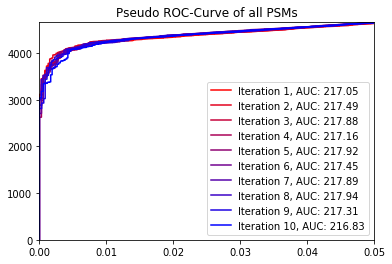

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 1504, length of negative training set: 210
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 1593, length of negative training set: 210
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 1706, length of negative training set: 210
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 113.39327795805565.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 1710, length of negative training set: 210
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 1693, length of negative training set: 210
Optimal parameters are C=

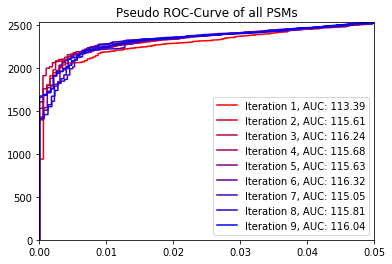

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 760, length of negative training set: 98
Optimal parameters are C=10 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 811, length of negative training set: 99
Optimal parameters are C=1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 862, length of negative training set: 99
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 55.742965523298814.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 863, length of negative training set: 98
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 855, length of negative training set: 99
Optimal parameters are C=1 and class_we

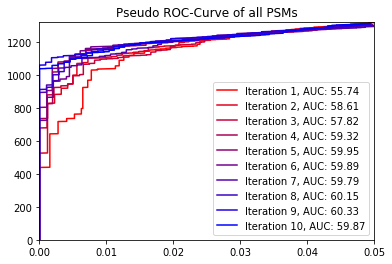

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 368, length of negative training set: 52
Optimal parameters are C=1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 387, length of negative training set: 52
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 424, length of negative training set: 52
Optimal parameters are C=10 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 29.390023437688896.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 417, length of negative training set: 52
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 422, length of negative training set: 52
Optimal parameters are C=1 and class

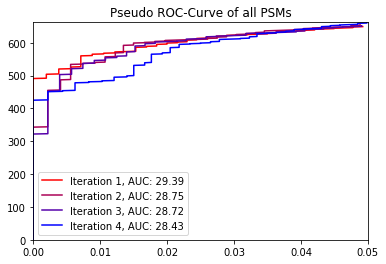

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 181, length of negative training set: 30
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 196, length of negative training set: 30
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 202, length of negative training set: 30
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 14.794472548821563.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 206, length of negative training set: 30
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 210, length of negative training set: 30
Optimal parameters are C=0.1 and 

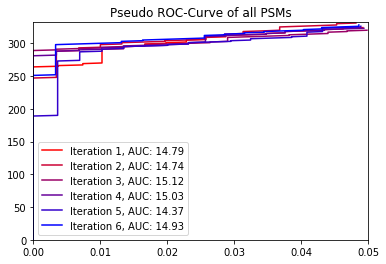

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 94, length of negative training set: 12
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 94, length of negative training set: 13
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 103, length of negative training set: 13
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 6.911179478044087.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 105, length of negative training set: 12
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 109, length of negative training set: 13
Optimal parameters are C=0.1 and class_wei

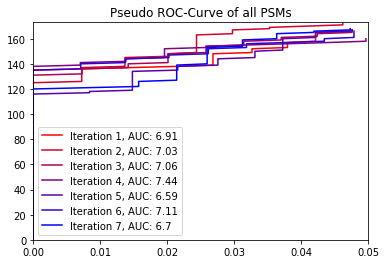

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 47, length of negative training set: 6
Optimal parameters are C=10 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 48, length of negative training set: 7
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 51, length of negative training set: 7
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 2.7889337438704516.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 49, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 52, length of negative training set: 7
Optimal parameters are C=0.1 and class_weig

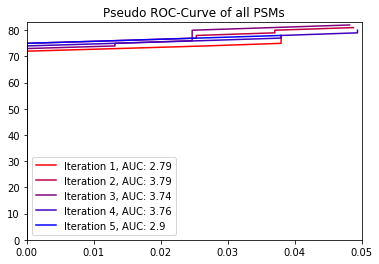

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 22, length of negative training set: 5
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 24, length of negative training set: 5
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 21, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 0.9558823529411766.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 20, length of negative training set: 5
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 20, length of negative training set: 5
Optimal parameters are C=0.1 and class_weig

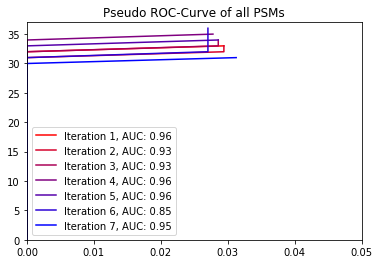

Dataset too small: 24 PSMs. Quitting evaluation.
Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 2983, length of negative training set: 432
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 3167, length of negative training set: 433
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 3366, length of negative training set: 433
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 214.9112353102597.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 3363, length of negative training set: 432
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 3388, length of negati

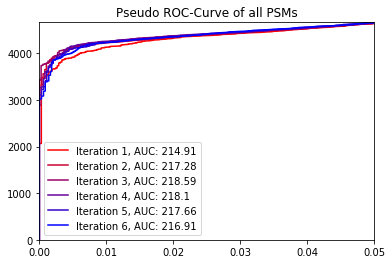

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 1474, length of negative training set: 210
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 1591, length of negative training set: 210
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 1712, length of negative training set: 210
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 111.34353462576759.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 1695, length of negative training set: 210
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 1699, length of negative training set: 210
Optimal parameters are C=

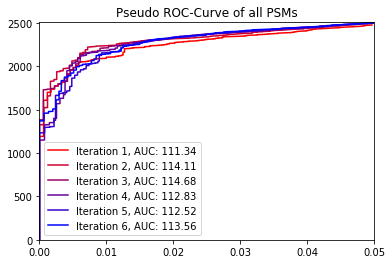

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 743, length of negative training set: 121
Optimal parameters are C=1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 767, length of negative training set: 121
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 837, length of negative training set: 122
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 57.332207457472464.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 833, length of negative training set: 121
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 834, length of negative training set: 121
Optimal parameters are C=0.1 

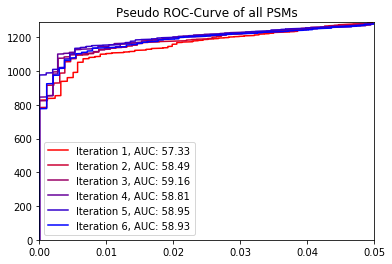

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 367, length of negative training set: 68
Optimal parameters are C=1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 391, length of negative training set: 69
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 411, length of negative training set: 69
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 29.383149967974248.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 405, length of negative training set: 68
Optimal parameters are C=1 and class_weight={0: 30, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 401, length of negative training set: 69
Optimal parameters are C=0.1 and cla

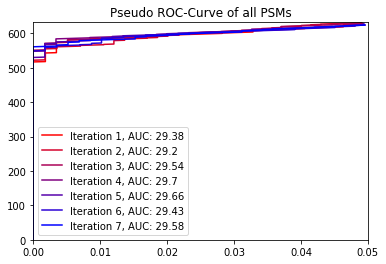

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 185, length of negative training set: 25
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 204, length of negative training set: 25
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 215, length of negative training set: 26
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 14.068707087119378.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 215, length of negative training set: 25
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 220, length of negative training set: 25
Optimal parameters are C=1 and class_

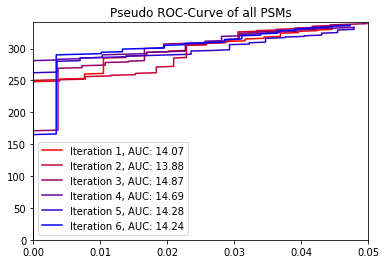

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 91, length of negative training set: 16
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 93, length of negative training set: 16
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 102, length of negative training set: 16
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 6.347905097416959.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 100, length of negative training set: 16
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 99, length of negative training set: 16
Optimal parameters are C=0.1 and class_wei

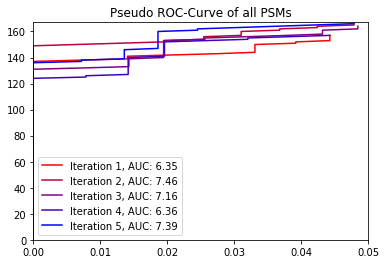

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 47, length of negative training set: 4
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 51, length of negative training set: 5
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 58, length of negative training set: 5
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 3.7234320236889693.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 56, length of negative training set: 4
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 56, length of negative training set: 5
Optimal parameters are C=0.1 and class_weig

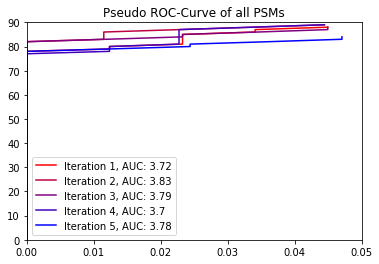

Dataset too small: 48 PSMs. Quitting evaluation.
Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 2997, length of negative training set: 432
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 3178, length of negative training set: 433
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 3347, length of negative training set: 433
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 215.89848086483488.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 3356, length of negative training set: 432
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 3354, length of negativ

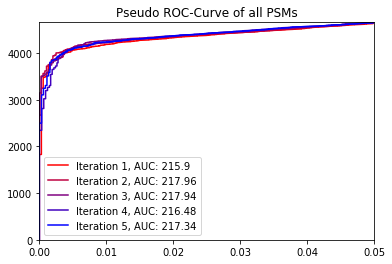

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 1482, length of negative training set: 222
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 1571, length of negative training set: 223
Optimal parameters are C=10 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 1679, length of negative training set: 223
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 115.76756964613017.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 1664, length of negative training set: 222
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 1688, length of negative training set: 223
Optimal parameters are C=10

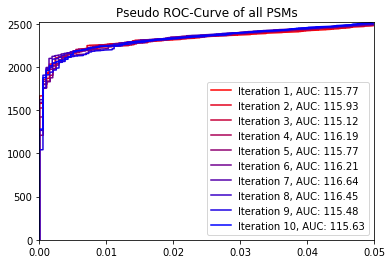

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 740, length of negative training set: 100
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 809, length of negative training set: 100
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 853, length of negative training set: 100
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 58.120979552090155.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 849, length of negative training set: 100
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 857, length of negative training set: 100
Optimal parameters are C=1 and 

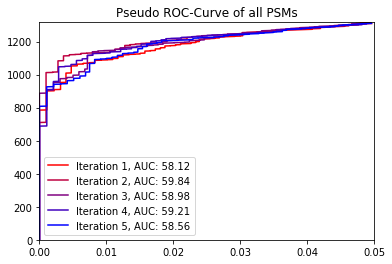

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 369, length of negative training set: 48
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 389, length of negative training set: 48
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 422, length of negative training set: 48
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 30.099726308241056.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 426, length of negative training set: 48
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 438, length of negative training set: 48
Optimal parameters are C=10 and clas

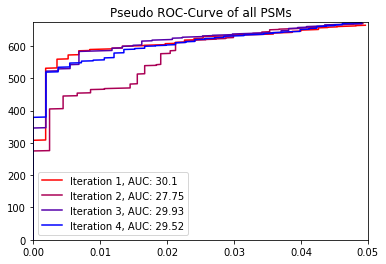

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 192, length of negative training set: 28
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 198, length of negative training set: 28
Optimal parameters are C=1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 201, length of negative training set: 28
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 14.505146116254727.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 204, length of negative training set: 28
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 210, length of negative training set: 28
Optimal parameters are C=10 and class_

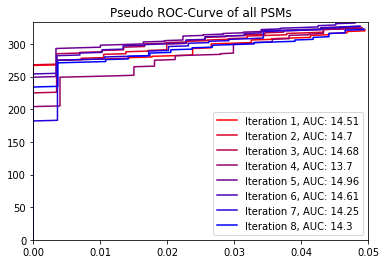

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 95, length of negative training set: 11
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 87, length of negative training set: 11
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 87, length of negative training set: 12
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 5.778180860375869.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 104, length of negative training set: 11
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 104, length of negative training set: 11
Optimal parameters are C=0.1 and class_wei

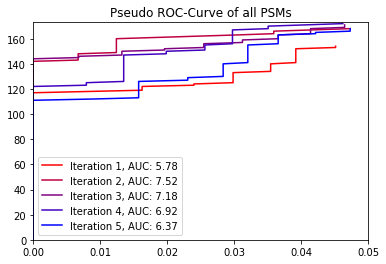

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 45, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 51, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 55, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 3.41187929717342.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 55, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 52, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={

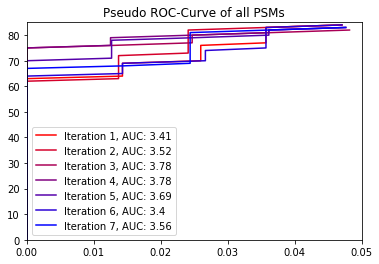

Dataset too small: 48 PSMs. Quitting evaluation.
Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 2987, length of negative training set: 432
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 3168, length of negative training set: 433
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 3361, length of negative training set: 433
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 214.21753193886252.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 3349, length of negative training set: 432
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 3365, length of neg

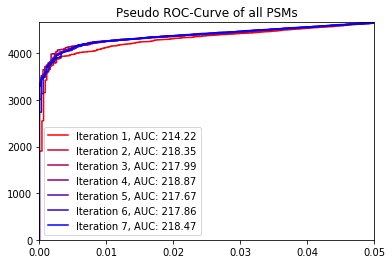

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 1484, length of negative training set: 208
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 1577, length of negative training set: 208
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 1689, length of negative training set: 208
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 115.58329067292442.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 1693, length of negative training set: 208
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 1701, length of negative training set: 208
Optimal parameters are C=1 

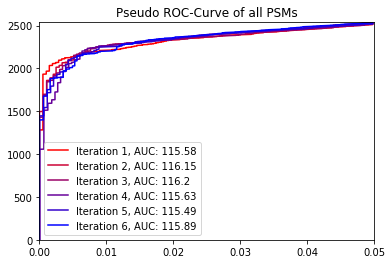

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 728, length of negative training set: 104
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 785, length of negative training set: 105
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 818, length of negative training set: 105
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 57.00117341705828.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 821, length of negative training set: 104
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 825, length of negative training set: 105
Optimal parameters are C=0.1 a

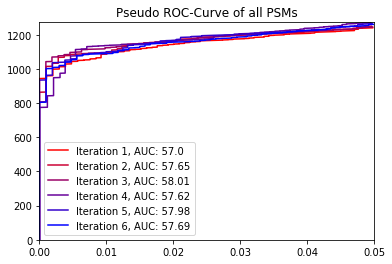

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 377, length of negative training set: 56
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 403, length of negative training set: 56
Optimal parameters are C=10 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 418, length of negative training set: 56
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 28.563374030193625.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 415, length of negative training set: 56
Optimal parameters are C=10 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 411, length of negative training set: 56
Optimal parameters are C=10 and class_

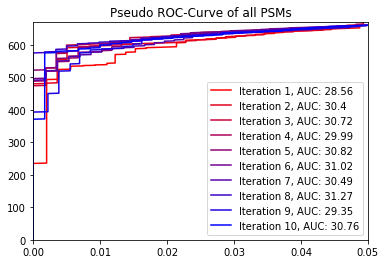

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 197, length of negative training set: 22
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 206, length of negative training set: 23
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 214, length of negative training set: 23
Optimal parameters are C=1 and class_weight={0: 30, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 14.419538349663327.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 221, length of negative training set: 22
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 219, length of negative training set: 23
Optimal parameters are C=0.1 and clas

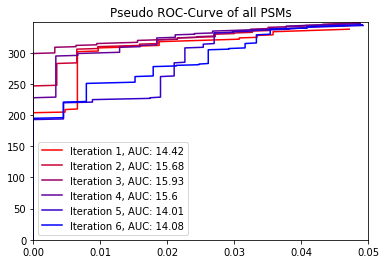

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 92, length of negative training set: 9
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 95, length of negative training set: 9
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 56, length of negative training set: 10
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 4.45317072105565.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 85, length of negative training set: 9
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 108, length of negative training set: 9
Optimal parameters are C=0.1 and class_weight=

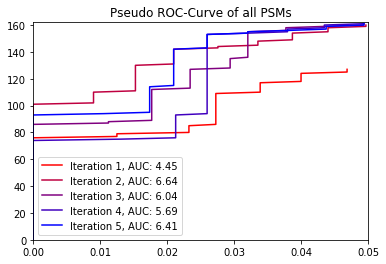

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 50, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 51, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 53, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 3.5505253595036925.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 55, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 55, length of negative training set: 6
Optimal parameters are C=0.1 and class_weigh

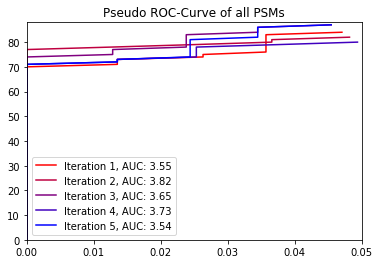

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 23, length of negative training set: 4
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 13, length of negative training set: 5
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 14, length of negative training set: 5
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 0.9499999999999997.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 19, length of negative training set: 4
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 19, length of negative training set: 5
Optimal parameters are C=0.1 and class_weigh

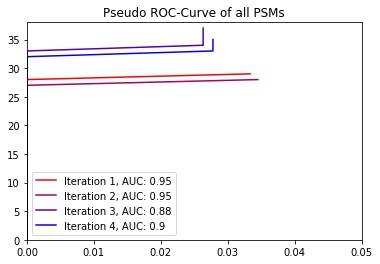

Dataset too small: 24 PSMs. Quitting evaluation.
Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 2982, length of negative training set: 432
Optimal parameters are C=1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 3210, length of negative training set: 433
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 3358, length of negative training set: 433
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 217.39097684896126.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 3372, length of negative training set: 432
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 3366, length of ne

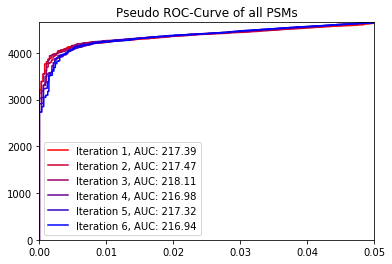

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 1495, length of negative training set: 223
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 1585, length of negative training set: 223
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 1678, length of negative training set: 224
Optimal parameters are C=10 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 114.44606067217477.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 1676, length of negative training set: 223
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 1664, length of negative training set: 223
Optimal parameters are C=0

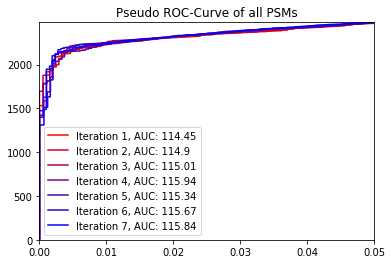

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 751, length of negative training set: 103
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 797, length of negative training set: 103
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 852, length of negative training set: 104
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 59.57266044688137.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 855, length of negative training set: 103
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 854, length of negative training set: 103
Optimal parameters are C=0.1 a

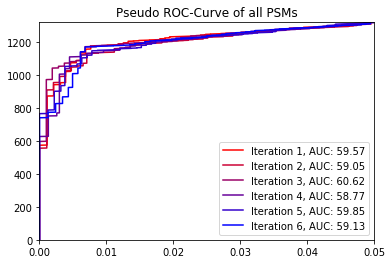

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 376, length of negative training set: 53
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 404, length of negative training set: 53
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 425, length of negative training set: 54
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 30.327026899644757.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 421, length of negative training set: 53
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 429, length of negative training set: 53
Optimal parameters are C=0.1 and

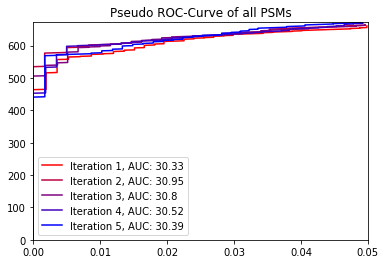

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 175, length of negative training set: 21
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 196, length of negative training set: 21
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 213, length of negative training set: 22
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 14.529810482931598.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 218, length of negative training set: 21
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 217, length of negative training set: 21
Optimal parameters are C=0.1 and class

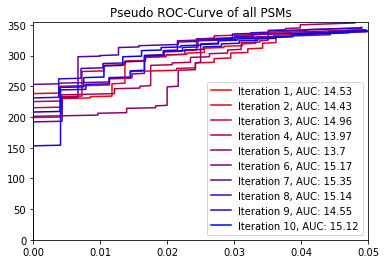

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 92, length of negative training set: 10
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 106, length of negative training set: 11
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 104, length of negative training set: 11
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 7.323010485834534.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 104, length of negative training set: 10
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 104, length of negative training set: 11
Optimal parameters are C=0.1 and class_wei

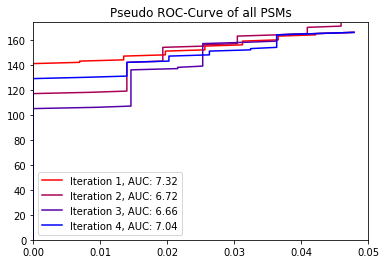

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 49, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 49, length of negative training set: 6
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 52, length of negative training set: 6
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 3.331230587420031.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 50, length of negative training set: 6
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 52, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 3

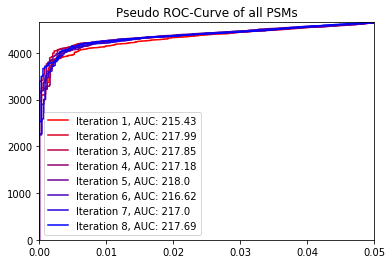

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 1508, length of negative training set: 209
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 1590, length of negative training set: 209
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 1658, length of negative training set: 210
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 113.20490824672186.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 1667, length of negative training set: 209
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 1700, length of negative training set: 209
Optimal parameters are C=0.1

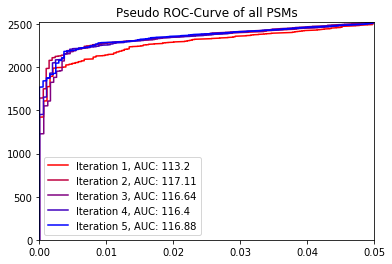

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 754, length of negative training set: 104
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 801, length of negative training set: 105
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 857, length of negative training set: 105
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 59.69997819350524.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 849, length of negative training set: 104
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 841, length of negative training set: 105
Optimal parameters are C=10 and

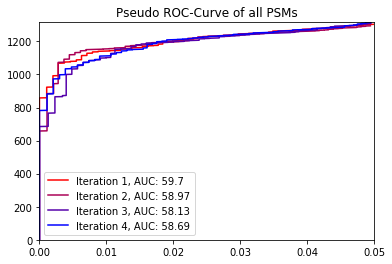

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 379, length of negative training set: 72
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 392, length of negative training set: 72
Optimal parameters are C=1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 407, length of negative training set: 72
Optimal parameters are C=1 and class_weight={0: 30, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 28.328120575672997.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 400, length of negative training set: 72
Optimal parameters are C=10 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 410, length of negative training set: 72
Optimal parameters are C=10 and class_we

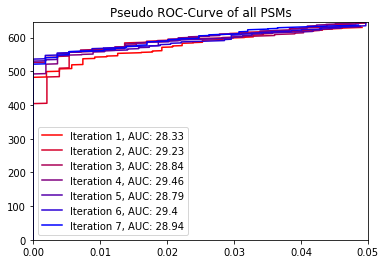

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 185, length of negative training set: 25
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 201, length of negative training set: 25
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 216, length of negative training set: 26
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 13.222875872046835.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 207, length of negative training set: 25
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 209, length of negative training set: 25
Optimal parameters are C=0.1 and c

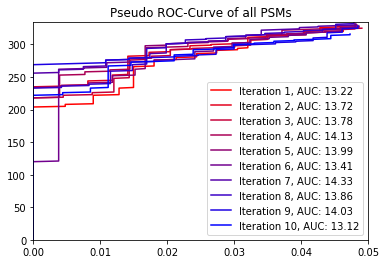

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 96, length of negative training set: 14
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 91, length of negative training set: 14
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 101, length of negative training set: 14
Optimal parameters are C=10 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 7.463956302131864.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 103, length of negative training set: 14
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 109, length of negative training set: 14
Optimal parameters are C=0.1 and class_

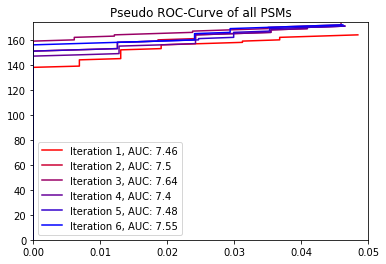

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 49, length of negative training set: 4
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 53, length of negative training set: 5
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 54, length of negative training set: 5
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 3.0177310200565985.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 55, length of negative training set: 4
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 54, length of negative training set: 5
Optimal parameters are C=0.1 and class_weight=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 237, in fit
    self.loss, sample_weight=sample_weight)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 928, in _fit_liblinear
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for th

Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 3 with split 2/3 starts!
Length of positive trainingset: 57, length of negative training set: 5
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Training in iteration 3 with split 3/3 starts!
Length of positive trainingset: 59, length of negative training set: 5
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Iteration 3/10 done! It yielded an auc of 3.0513429470203963.

Training in iteration 4 with split 1/3 starts!
Length of positive trainingset: 55, length of negative training set: 4
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 4 with split 2/3 starts!
Length of positive trainingset: 58, length of negative training set: 5
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 4 with split 3/3 starts!
Length of positive trainingset: 58, length of negative training set: 5
Optimal parameters are C=0.1 and class_we

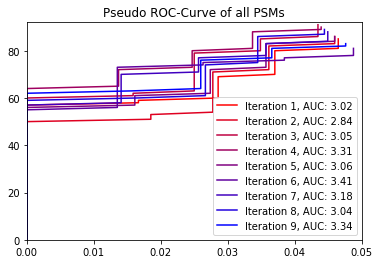

Dataset too small: 48 PSMs. Quitting evaluation.
Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 2952, length of negative training set: 432
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 3156, length of negative training set: 433
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 3358, length of negative training set: 433
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 216.8022500316937.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 3366, length of negative training set: 432
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 3385, length of negat

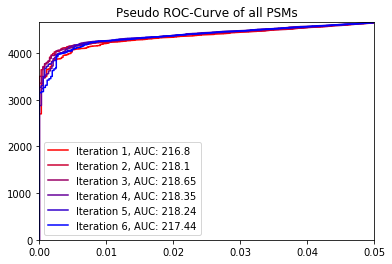

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 1479, length of negative training set: 228
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 1541, length of negative training set: 228
Optimal parameters are C=1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 1637, length of negative training set: 228
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 112.06970286371414.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 1625, length of negative training set: 228
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 1630, length of negative training set: 228
Optimal parameters are C=0

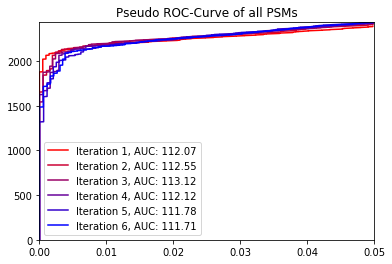

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 734, length of negative training set: 106
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 800, length of negative training set: 106
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 859, length of negative training set: 106
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 57.464720285587276.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 854, length of negative training set: 106
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 844, length of negative training set: 106
Optimal parameters are C=1 

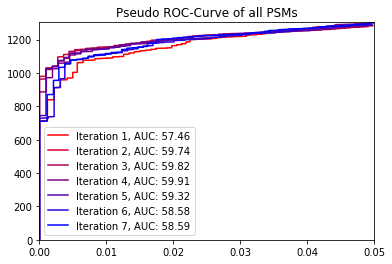

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 374, length of negative training set: 50
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 402, length of negative training set: 50
Optimal parameters are C=1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 424, length of negative training set: 50
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 30.737678661200107.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 427, length of negative training set: 50
Optimal parameters are C=10 and class_weight={0: 30, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 434, length of negative training set: 50
Optimal parameters are C=0.1 and clas

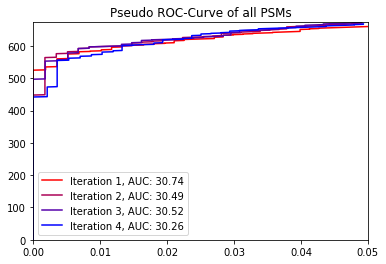

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 183, length of negative training set: 25
Optimal parameters are C=10 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 198, length of negative training set: 25
Optimal parameters are C=1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 218, length of negative training set: 26
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 14.392035145114566.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 217, length of negative training set: 25
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 213, length of negative training set: 25
Optimal parameters are C=0.1 and class_

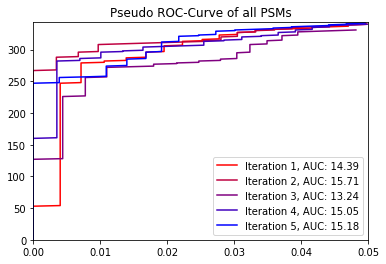

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 102, length of negative training set: 10
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 99, length of negative training set: 10
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 105, length of negative training set: 10
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 6.590564214791597.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 107, length of negative training set: 10
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 113, length of negative training set: 10
Optimal parameters are C=0.1 and class_

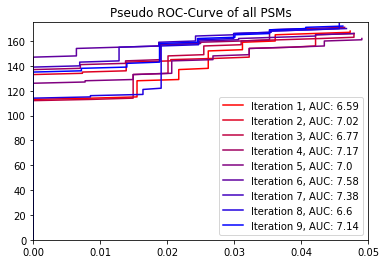

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 44, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 48, length of negative training set: 7
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 53, length of negative training set: 7
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 3.8018052182686364.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 51, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 54, length of negative training set: 7
Optimal parameters are C=0.1 and class_weight

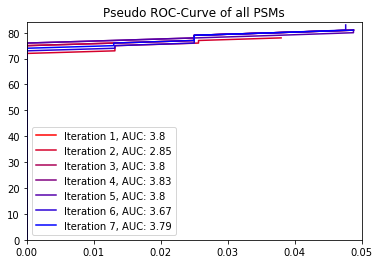

Dataset too small: 48 PSMs. Quitting evaluation.
Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 2970, length of negative training set: 432
Optimal parameters are C=10 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 3153, length of negative training set: 433
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 3382, length of negative training set: 433
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 216.68147710560288.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 3352, length of negative training set: 432
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 3361, length of negat

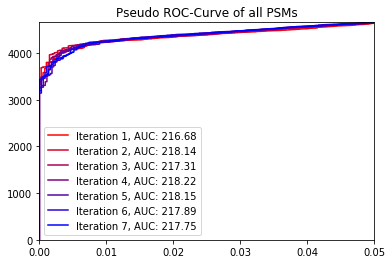

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 1472, length of negative training set: 225
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 1558, length of negative training set: 225
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 1653, length of negative training set: 226
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 113.30310232289006.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 1669, length of negative training set: 225
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 1668, length of negative training set: 225
Optimal parameters are C=

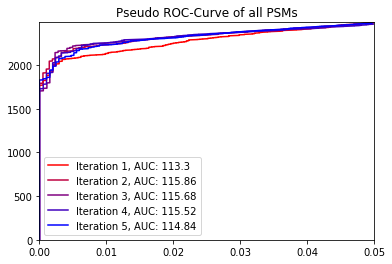

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 752, length of negative training set: 102
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 789, length of negative training set: 103
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 848, length of negative training set: 103
Optimal parameters are C=1 and class_weight={0: 30, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 60.514380857864516.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 851, length of negative training set: 102
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 853, length of negative training set: 103
Optimal parameters are C=10 a

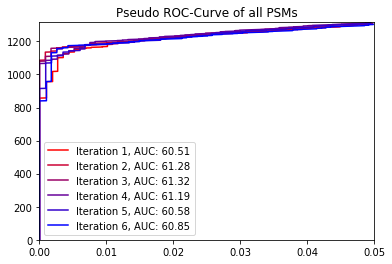

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 367, length of negative training set: 53
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 393, length of negative training set: 53
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 419, length of negative training set: 54
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 29.120150696696157.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 435, length of negative training set: 53
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 426, length of negative training set: 53
Optimal parameters are C=1 and c

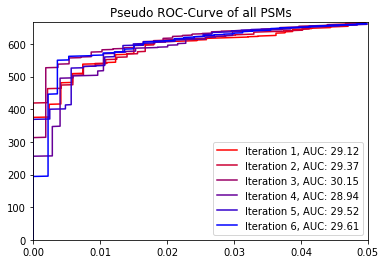

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 182, length of negative training set: 30
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 198, length of negative training set: 30
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 208, length of negative training set: 30
Optimal parameters are C=10 and class_weight={0: 30, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 14.545313626916823.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 210, length of negative training set: 30
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 197, length of negative training set: 30
Optimal parameters are C=1 and class_

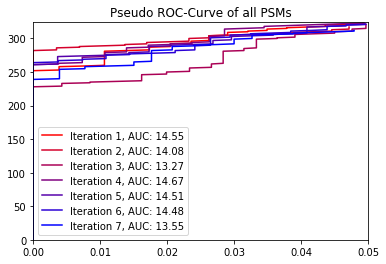

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 98, length of negative training set: 10
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 102, length of negative training set: 11
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 106, length of negative training set: 11
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 7.3026374412523625.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 106, length of negative training set: 10
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 108, length of negative training set: 11
Optimal parameters are C=0.1 and class_we

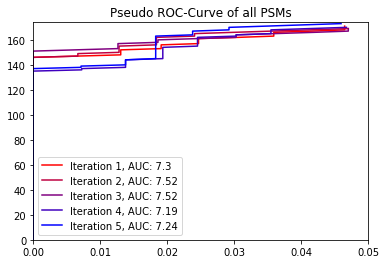

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 49, length of negative training set: 5
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 45, length of negative training set: 5
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 51, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 2.9892156862745143.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 50, length of negative training set: 5
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 52, length of negative training set: 5
Optimal parameters are C=0.1 and class_weigh

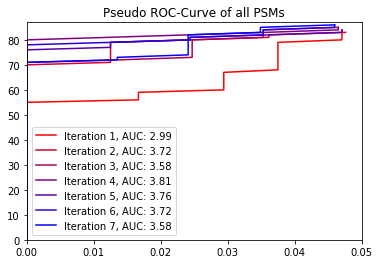

Dataset too small: 48 PSMs. Quitting evaluation.
Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 2957, length of negative training set: 432
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 3174, length of negative training set: 433
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 3381, length of negative training set: 433
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 216.68829562468053.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 3376, length of negative training set: 432
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 3355, length of nega

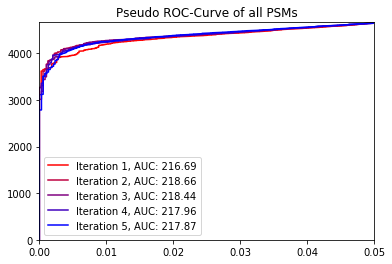

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 1485, length of negative training set: 205
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 1639, length of negative training set: 205
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 1698, length of negative training set: 206
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 115.79547082736086.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 1700, length of negative training set: 205
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 1704, length of negative training set: 205
Optimal parameters are 

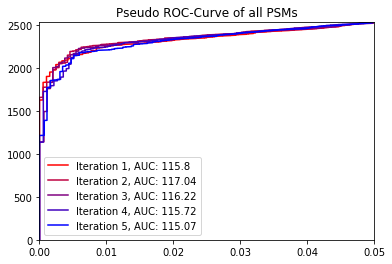

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 739, length of negative training set: 104
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 795, length of negative training set: 105
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 848, length of negative training set: 105
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 58.97555358099634.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 854, length of negative training set: 104
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 853, length of negative training set: 105
Optimal parameters are C=1 an

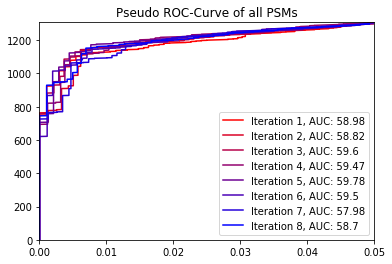

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 362, length of negative training set: 55
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 391, length of negative training set: 55
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 436, length of negative training set: 56
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 29.42005695009921.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 428, length of negative training set: 55
Optimal parameters are C=10 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 424, length of negative training set: 55
Optimal parameters are C=1 and class_w

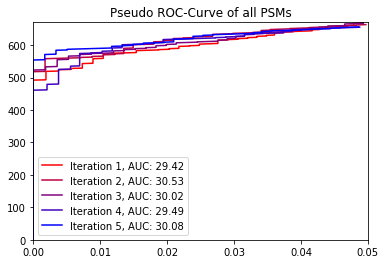

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 187, length of negative training set: 26
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 191, length of negative training set: 26
Optimal parameters are C=1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 206, length of negative training set: 26
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 13.957077398744504.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 209, length of negative training set: 26
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 208, length of negative training set: 26
Optimal parameters are C=0.1 and cla

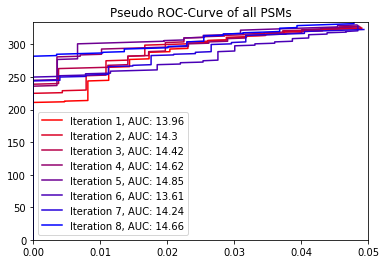

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 94, length of negative training set: 12
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 97, length of negative training set: 13
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 102, length of negative training set: 13
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 6.470925695946729.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 104, length of negative training set: 12
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 105, length of negative training set: 13
Optimal parameters are C=1 and class_w

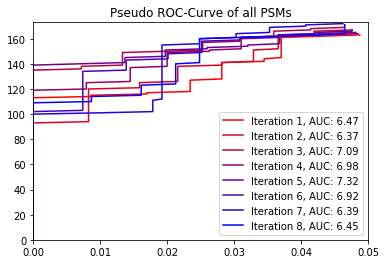

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 50, length of negative training set: 5
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 55, length of negative training set: 5
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 55, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 3.456207964287535.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 56, length of negative training set: 5
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 57, length of negative training set: 5
Optimal parameters are C=0.1 and class_weight={0

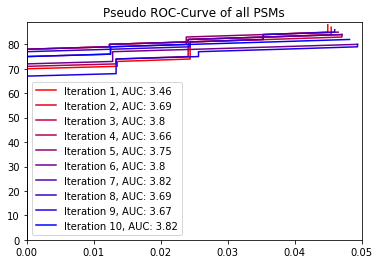

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 23, length of negative training set: 3
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 27, length of negative training set: 3
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 26, length of negative training set: 4
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 0.930555555555556.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 22, length of negative training set: 3
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 17, length of negative training set: 3
Optimal parameters are C=0.1 and class_weight={

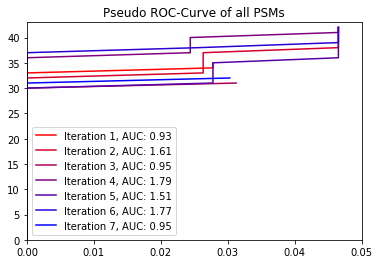

Dataset too small: 24 PSMs. Quitting evaluation.
Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 3001, length of negative training set: 432
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 3173, length of negative training set: 433
Optimal parameters are C=10 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 3352, length of negative training set: 433
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 215.1636758448879.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 3338, length of negative training set: 432
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 3361, length of negat

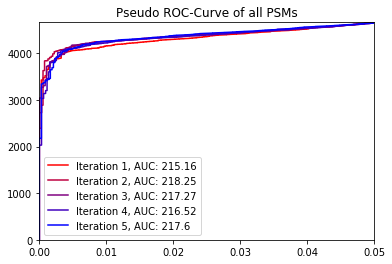

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 1506, length of negative training set: 199
Optimal parameters are C=10 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 1603, length of negative training set: 199
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 1738, length of negative training set: 200
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 116.56975840684296.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 1730, length of negative training set: 199
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 1711, length of negative training set: 199
Optimal parameters are C

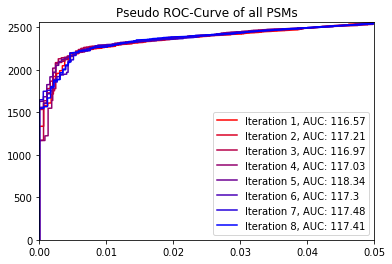

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 765, length of negative training set: 112
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 800, length of negative training set: 113
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 830, length of negative training set: 113
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 59.3458175580593.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 840, length of negative training set: 112
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 835, length of negative training set: 113
Optimal parameters are C=1 and 

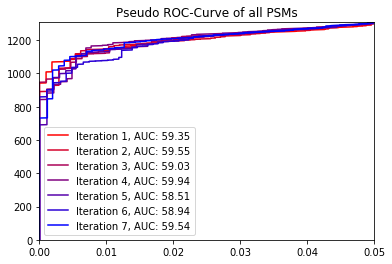

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 365, length of negative training set: 60
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 395, length of negative training set: 60
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 416, length of negative training set: 60
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 28.667575966448872.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 412, length of negative training set: 60
Optimal parameters are C=10 and class_weight={0: 30, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 414, length of negative training set: 60
Optimal parameters are C=0.1 and cl

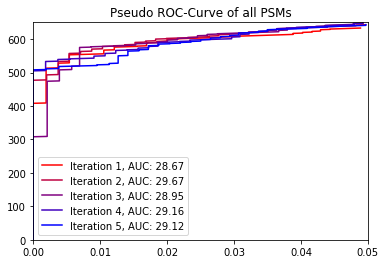

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 180, length of negative training set: 26
Optimal parameters are C=1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 200, length of negative training set: 27
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 212, length of negative training set: 27
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 12.676369619408801.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 208, length of negative training set: 26
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 205, length of negative training set: 27
Optimal parameters are C=0.1 and cl

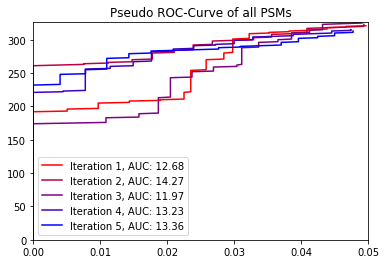

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 90, length of negative training set: 14
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 90, length of negative training set: 15
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 97, length of negative training set: 15
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 7.092042008911533.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 99, length of negative training set: 14
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 97, length of negative training set: 15
Optimal parameters are C=1 and class_wei

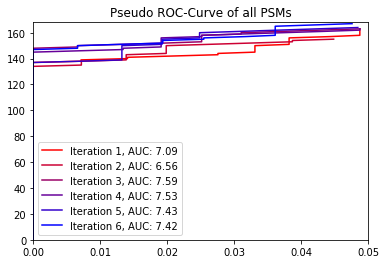

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 43, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 50, length of negative training set: 7
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 53, length of negative training set: 7
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 3.5218672482855835.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 51, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 52, length of negative training set: 7
Optimal parameters are C=0.1 and class_weig

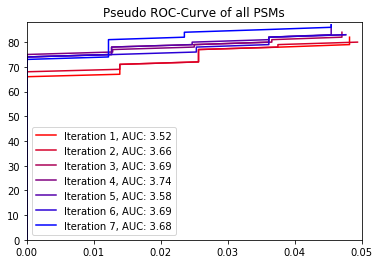

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 24, length of negative training set: 3
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 23, length of negative training set: 3
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 20, length of negative training set: 4
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 0.9285714285714288.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 20, length of negative training set: 3
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 16, length of negative training set: 3
Optimal parameters are C=0.1 and class_weight

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 237, in fit
    self.loss, sample_weight=sample_weight)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 928, in _fit_liblinear
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for th

Iteration 2/10 done! It yielded an auc of 0.8448275862068955.

Re-ranking complete. Cutting off low ranks.

Training in iteration 3 with split 1/3 starts!
Length of positive trainingset: 16, length of negative training set: 3
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 3 with split 2/3 starts!
Length of positive trainingset: 15, length of negative training set: 3
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 237, in fit
    self.loss, sample_weight=sample_weight)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 928, in _fit_liblinear
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for th

Training in iteration 3 with split 3/3 starts!
Length of positive trainingset: 20, length of negative training set: 4
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Iteration 3/10 done! It yielded an auc of 1.695887445887444.

Training in iteration 4 with split 1/3 starts!
Length of positive trainingset: 27, length of negative training set: 3
Optimal parameters are C=0.1 and class_weight={0: 30, 1: 10}.

Training in iteration 4 with split 2/3 starts!
Length of positive trainingset: 17, length of negative training set: 3
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Training in iteration 4 with split 3/3 starts!
Length of positive trainingset: 15, length of negative training set: 4
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 10}.

Iteration 4/10 done! It yielded an auc of 1.4035476718403563.

Training in iteration 5 with split 1/3 starts!
Length of positive trainingset: 21, length of negative training set: 3
Optimal parameters are C=0.1 and cl

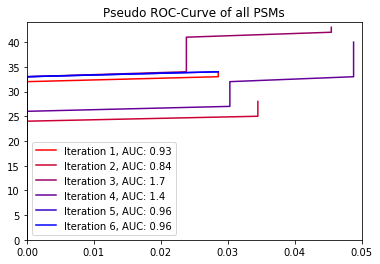

Dataset too small: 24 PSMs. Quitting evaluation.


In [6]:
# calculate metrics of percolator results

# expected idents if algorithm would work as well as NuXL:score
expId = []

# expected idents if the algorithm would work as well as with the whole data set
pExpectIdents = []

pIdents = []
pLen = []
pAUCs = []

# With which portion the algorithm terminated
pAbort = []

saveName = ''

iters = 12 # smallest df has 3 entries
for i in range(sampSize):
    stdExpIdTemp = []
    expIdTemp = []
    idTemp = []
    lenTemp = []
    aucTemp = []
    
    for portion in range(iters):
        dxl = dSlow.loc[dSlow['NuXL:isXL'] == 1]

#         ix = list(dxl.index)
        newDf = dxl.loc[dxl['q-val'] <= 0.1].sample(frac = 1/pow(2,portion))
        stdExpIdTemp.append(len(newDf.loc[newDf['q-val'] <= 0.01]))
        newIx = newDf.index

        try:
            pxl = percolator_experimental(newDf, idCol, features, plotSaveName = saveName, plotXLnXL = False)
        except:
            print('Dataset too small: {} PSMs. Quitting evaluation.'.format(len(newDf)))
            del stdExpIdTemp[-1]
            break

        if (portion == 0):
            fullP = pd.DataFrame(pxl.loc[:,['Label', 'percolator_score', 'q-val']])

        # maybe calc Q with sampled subset of fullP?
        expIdTemp.append(len(fullP.loc[(fullP.index.isin(newIx)) & (fullP['q-val'] <= 0.01)]))

        try:
            aucTemp.append(pseudoROC(pxl, plot = False))
        except:
            print('Error while calculating AUC in iteration {}/{}!'.format(portion + 1, iters))
            aucTemp.append(0.0)
        lenTemp.append(len(pxl))
        idTemp.append(len(pxl.loc[pxl['q-val'] <= 0.01]))
        
    pAbort.append(portion)
    expId.append(stdExpIdTemp)
    pExpectIdents.append(expIdTemp)
    pLen.append(lenTemp)
    pIdents.append(idTemp)
    pAUCs.append(aucTemp)

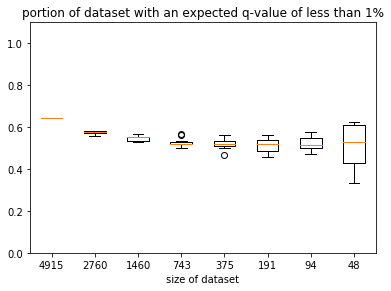

In [68]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_ylim(0,1.1)
x = range(1,max(pAbort) + 1)

# for every sample round, for every dataset size, divide number of expected idents by the dataset size
l = [[e/l for e,l in zip(es,ls)] for es,ls in zip(expId,pLen)]
# for missing iterations, fill in nan
for k in l:
    while(len(k) != max(pAbort)):
        k.append(np.nan)
# transpose for boxplots
y = list(map(list, zip(*l)))
# filter nan for boxplot
y = [[i for i in ls if not np.isnan(i)] for ls in y]

ax.boxplot(y)
ax.set_xlabel('size of dataset')
ax.set_title('portion of dataset with an expected q-value of less than 1%')
ax.set_xticks(x)
ax.set_xticklabels(pLen[np.argmax(pAbort)])
plt.savefig('../results/ratioTests/boxplots/result_splitting_pxl.png')
plt.show()

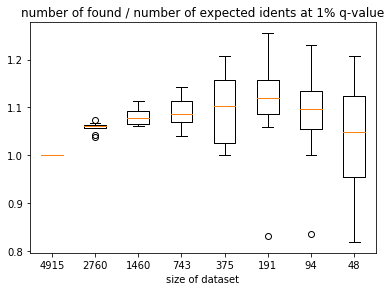

In [69]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
x = range(1,max(pAbort) + 1)

# for every sample round, for every dataset size, divide number of idents by the number of expected idents, or 1 if we expect 0
l = [[i/e if (e != 0) else np.nan for i,e in zip(ils,es)] for ils,es in zip(pIdents,pExpectIdents)]
# for missing iterations, fill in nan
for k in l:
    while(len(k) != max(pAbort)):
        k.append(np.nan)
# transpose for boxplots
y = list(map(list, zip(*l)))
# remove nan for boxplot
y = [[i for i in ls if not np.isnan(i)] for ls in y]

ax.boxplot(y)
ax.set_xlabel('size of dataset')
ax.set_title('number of found / number of expected idents at 1% q-value')
ax.set_xticks(x)
ax.set_xticklabels(pLen[np.argmax(pAbort)])
plt.savefig('../results/ratioTests/boxplots/found_vs_expected_pxl.png')
plt.show()

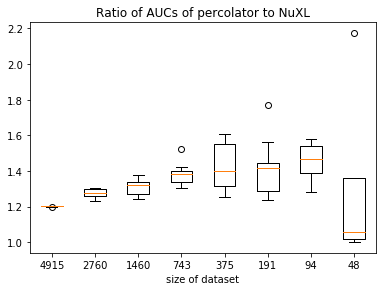

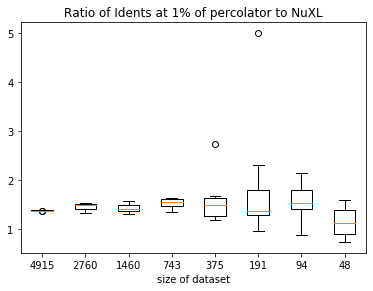

In [70]:
x = range(1,max(pAbort) + 1)

# for every sample round, for every dataset size, divide percolator result by original result
ratioAUCs = [[p/o if (o != 0) else np.nan for p,o in zip(ps,os)] for ps,os in zip(pAUCs,oriAUCs)]
ratioIdents = [[p/o if (o != 0) else np.nan for p,o in zip(ps,os)] for ps,os in zip(pIdents,oriIdents)]

# for missing iterations, fill in nan
for k in ratioAUCs:
    while(len(k) != max(pAbort)):
        k.append(np.nan)
for k in ratioIdents:
    while(len(k) != max(pAbort)):
        k.append(np.nan)
        
# transpose for boxplots
yAUC = list(map(list, zip(*ratioAUCs)))
yIdents = list(map(list, zip(*ratioIdents)))

# remove nan for boxplot
yAUC = [[i for i in ls if not np.isnan(i)] for ls in yAUC]
yIdents = [[i for i in ls if not np.isnan(i)] for ls in yIdents]

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.boxplot(yAUC)
ax.set_xlabel('size of dataset')
ax.set_title('Ratio of AUCs of percolator to NuXL')
ax.set_xticks(x)
ax.set_xticklabels(pLen[np.argmax(pAbort)])
plt.savefig('../results/ratioTests/boxplots/auc_p_vs_ori.png')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.boxplot(yIdents)
ax.set_xlabel('size of dataset')
ax.set_title('Ratio of Idents at 1% of percolator to NuXL')
ax.set_xticks(x)
ax.set_xticklabels(pLen[np.argmax(pAbort)])
plt.savefig('../results/ratioTests/boxplots/idents_p_vs_ori.png')
plt.show()

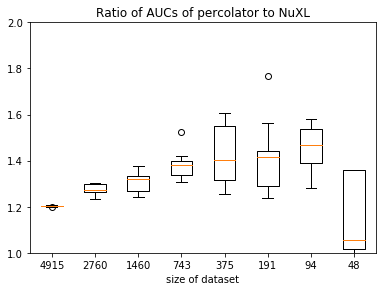

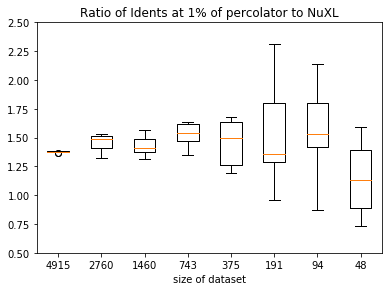

In [71]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.boxplot(yAUC)
ax.set_ylim(1,2)
ax.set_xlabel('size of dataset')
ax.set_title('Ratio of AUCs of percolator to NuXL')
ax.set_xticks(x)
ax.set_xticklabels(pLen[np.argmax(pAbort)])
plt.savefig('../results/ratioTests/boxplots/auc_p_vs_ori_zoomed.png')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.boxplot(yIdents)
ax.set_ylim(0.5,2.5)
ax.set_xlabel('size of dataset')
ax.set_title('Ratio of Idents at 1% of percolator to NuXL')
ax.set_xticks(x)
ax.set_xticklabels(pLen[np.argmax(pAbort)])
plt.savefig('../results/ratioTests/boxplots/idents_p_vs_ori_zoomed.png')
plt.show()